In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Analyzing the Rössler attractor

The Rössler attractor is the strange attractor of the following 3D flow:


\begin{align}
\dot{x} & = -y-z \\
\dot{y} & = x+ay \\
\dot{z} & = b+z(x-c)
\end{align}

We choose $a=b=0.1$ and $c=14$.

### Function definition
1) Define a function to describe the rössler  ODE:

2) Define a function that outputs the $z$-derivative for finding the maximums. A maximum occurs when this function crosses zero with a negative slope:

In [2]:
a = 0.1
b = 0.1
c = 14

def rössler(t, y):
    dx = -y[1]-y[2]
    dy = y[0] + a*y[1]
    dz = b + y[2] * (y[0] - c)
    
    return np.array([dx, dy, dz])


def maxima(t, y):
    return b + y[2] * (y[0] - c)

maxima.direction = -1


### b) Visualization

Start with 𝑥=𝑦=𝑧=1 and simulate the trajectory for 2000 time units. We pass max_step=0.05 to the solver:

In [3]:
sol = solve_ivp(rössler, [0,2000], [1, 1, 1],
                events = maxima,
                dense_output = True, max_step=0.05)

sect = sol.sol(sol.t_events[0])[:,15:]

We plot the result in a (𝑥,𝑦+𝑧) coordinate system. This gives us a basic *"3D"* look at the attractor. 

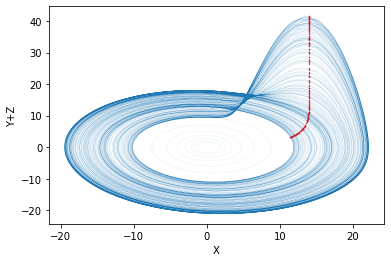

In [4]:
plt.plot(sol.y[0], sol.y[1]+sol.y[2], linewidth = 0.05)
plt.scatter(sect[0], sect[1]+sect[2], s=0.1, color = 'r')

plt.xlabel("X")
plt.ylabel("Y+Z")
plt.show()

To see a "true" 3D plot, we can use the %matplotlib notebook to get an interactive plot widget in Jupyter. To see the plot, uncomment the following cell:

In [5]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

# fig = plt.figure()
# ax = Axes3D(fig)

# ax.plot(sol.y[0], sol.y[1], sol.y[2], linewidth = 0.05)
# ax.scatter(sect[0], sect[1], sect[2], s=0.1, color = 'r')

# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_xlabel("Y")

### Recurrence map

Make a scatter plot between the heights of the maximums $z_n$ and the height of the following maximum $z_{n+1}$.

Text(0, 0.5, '$z_{n+1}$')

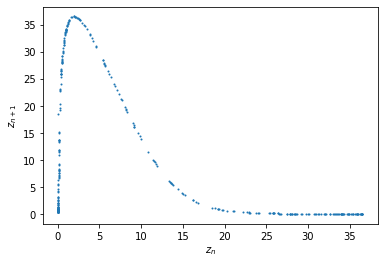

In [9]:
plt.scatter(sect[2], np.roll(sect[2], -1), s=1)

plt.xlabel("$z_n$")
plt.ylabel("$z_{n+1}$")